In [10]:
# Mudasir Naeem
# Kohaq Internship Week 1 Tasks

In [19]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load and overview the dataset

df = pd.read_csv("/content/sample_data/Consolidated (Educational Dataset).csv")
df

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),...,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,...,351415.0,12.0,10.0,AJK,14.800000,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,...,301633.0,149.0,19.0,AJK,75.200000,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,NaN,...,NaN,6.0,11.0,AJK,0.000000,22.463768,5379,43.840580,379,2013
3,60.77%,0.827225,39.23%,0.041885,0.130890,1.57%,22.44%,7.09%,12.20%,600.0,...,150000.0,8.0,25.0,AJK,0.000000,13.048128,5379,26.203209,262,2013
4,60.75%,0.592348,39.25%,0.346966,0.060686,7.12%,23.06%,9.78%,13.60%,2162.0,...,834094.0,263.0,46.0,AJK,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,63.98%,0.214286,36.02%,0.215633,0.570081,31.77%,12.64%,23.71%,20.58%,5165.0,...,908373.0,160.0,423.0,Sindh,59.000000,55.390836,1803,62.533693,831,2016
576,73.89%,0.000000,26.11%,0.440000,0.743158,14.16%,22.81%,25.17%,19.08%,2310.0,...,550000.0,418.0,706.0,Sindh,43.668667,43.010526,1803,50.947368,1017,2016
577,75.73%,0.024200,24.27%,0.417585,0.558215,2.10%,15.12%,10.10%,19.79%,19638.0,...,955812.0,1553.0,2076.0,Sindh,26.000000,26.071525,1803,33.019629,4008,2016
578,71.06%,0.018284,28.94%,0.514768,0.466948,2.71%,22.57%,4.82%,25.48%,19638.0,...,914291.0,732.0,664.0,Sindh,18.000000,19.774965,1803,35.161744,1515,2016


In [21]:
print("Dataset Overview:")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Names:")
print("=" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nFirst 5 rows:")
print("=" * 30)
print(df.head())

print("\nDataset Info:")
print("=" * 30)
print(df.info())

print("\nBasic Statistics:")
print("=" * 30)
print(df.describe())


Dataset Overview:
Dataset Shape: (580, 51)
Number of rows: 580
Number of columns: 51

Column Names:
 1. % Boys Enrolled
 2. % Complete Primary Schools
 3. % Girls Enrolled
 4. % Primary Schools with single classroom
 5. % Primary Schools with single teacher
 6. All Four Facilities
 7. Any One Facility
 8. Any Three Facilities
 9. Any Two Facilities
10. Area (km²)
11. Bomb Blasts Occurred
12. Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)
13. Boundary wall
14. Building condition satisfactory
15. MeasureGroup 1 Measures
16. Color By Measure Value
17. Show Sheet
18. Table of Contents
19. Other Factors Measure Value
20. Analysis Level Selector
21. Color By Measure Name
22. Complete Primary Schools
23. Country
24. City
25. Drinking water
26. Drone attacks in Pakistan
27. Education score
28. Educational Budget Spend of GDP
29. Electricity
30. Enrolment score
31. Gender parity score
32. Global Terrorism Index - Pakistan
33. Learning score
34. MeasureGroup

In [22]:
print("\nMissing Values:")
print("=" * 30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

print("\nUnique Values in Categorical Columns:")
print("=" * 40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() <= 10:
        print(f"   Values: {df[col].unique()}")
    print()



Missing Values:
                                     Column  Missing Count  Missing Percentage
9                                Area (km²)             68           11.724138
41                               Population             68           11.724138
1                % Complete Primary Schools              4            0.689655
5                       All Four Facilities              4            0.689655
6                          Any One Facility              4            0.689655
4     % Primary Schools with single teacher              4            0.689655
3   % Primary Schools with single classroom              4            0.689655
21                 Complete Primary Schools              4            0.689655
34                              No Facility              4            0.689655
8                        Any Two Facilities              4            0.689655
7                      Any Three Facilities              4            0.689655
42    Primary Schools with single c

In [23]:
# Data Cleaning Function
def clean_percentage_columns(df):
    """Clean percentage columns by removing % and converting to float"""
    percentage_cols = [col for col in df.columns if '%' in col]

    for col in percentage_cols:
        # Handle both string and numeric data
        if df[col].dtype == 'object':
            # Remove % symbol and convert to numeric
            df[col] = pd.to_numeric(df[col].astype(str).str.replace('%', ''), errors='coerce')
        else:
            # If already numeric, ensure it's float
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# Apply cleaning
print("Cleaning percentage columns...")
df_cleaned = clean_percentage_columns(df.copy())

# Update the main dataframe with cleaned data
df = df_cleaned.copy()

print("\nProvince Distribution:")
print("=" * 30)
if 'Province' in df.columns:
    print(df['Province'].value_counts())

print("\nYear Distribution:")
print("=" * 30)
if 'Year' in df.columns:
    print(df['Year'].value_counts())


Cleaning percentage columns...

Province Distribution:
Province
Punjab         144
Balochistan    120
KP             100
Sindh           92
FATA            52
AJK             40
GB              28
ICT              4
Name: count, dtype: int64

Year Distribution:
Year
2013    145
2014    145
2015    145
2016    145
Name: count, dtype: int64


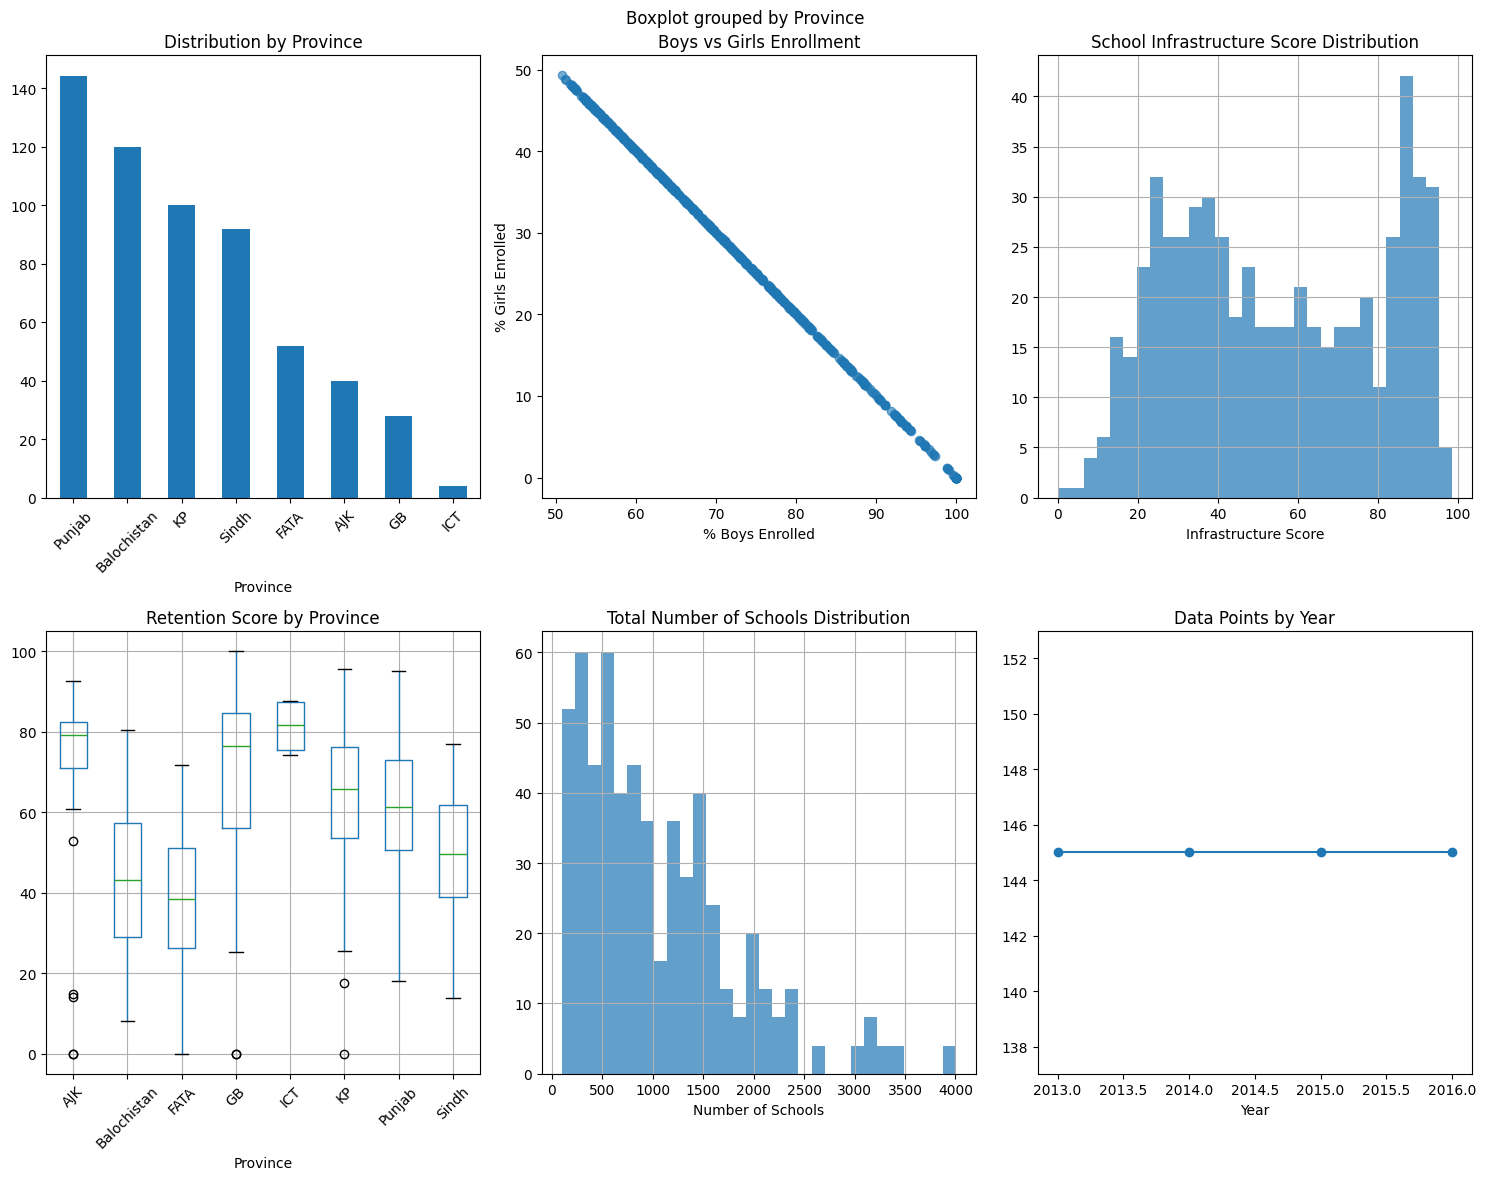

In [24]:
# Basic Visualizations
plt.figure(figsize=(15, 12))

# 1. Province distribution
if 'Province' in df.columns:
    plt.subplot(2, 3, 1)
    df['Province'].value_counts().plot(kind='bar')
    plt.title('Distribution by Province')
    plt.xticks(rotation=45)

# 2. Boys vs Girls enrollment
boys_col = '% Boys Enrolled'
girls_col = '% Girls Enrolled'
if boys_col in df.columns and girls_col in df.columns:
    plt.subplot(2, 3, 2)
    # Remove NaN values for plotting
    valid_data = df[[boys_col, girls_col]].dropna()
    if not valid_data.empty:
        plt.scatter(valid_data[boys_col], valid_data[girls_col], alpha=0.6)
        plt.xlabel('% Boys Enrolled')
        plt.ylabel('% Girls Enrolled')
        plt.title('Boys vs Girls Enrollment')
    else:
        plt.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Boys vs Girls Enrollment (No Data)')

# 3. School infrastructure score distribution
infra_col = 'School infrastructure score'
if infra_col in df.columns:
    plt.subplot(2, 3, 3)
    valid_infra = df[infra_col].dropna()
    if not valid_infra.empty:
        valid_infra.hist(bins=30, alpha=0.7)
        plt.title('School Infrastructure Score Distribution')
        plt.xlabel('Infrastructure Score')
    else:
        plt.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Infrastructure Score (No Data)')

# 4. Retention score by province
retention_col = 'Retention score'
if retention_col in df.columns and 'Province' in df.columns:
    plt.subplot(2, 3, 4)
    valid_retention = df[[retention_col, 'Province']].dropna()
    if not valid_retention.empty:
        valid_retention.boxplot(column=retention_col, by='Province', ax=plt.gca())
        plt.title('Retention Score by Province')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Retention Score by Province (No Data)')

# 5. Total schools distribution
schools_col = 'Total number of schools'
if schools_col in df.columns:
    plt.subplot(2, 3, 5)
    valid_schools = df[schools_col].dropna()
    if not valid_schools.empty:
        valid_schools.hist(bins=30, alpha=0.7)
        plt.title('Total Number of Schools Distribution')
        plt.xlabel('Number of Schools')
    else:
        plt.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Number of Schools (No Data)')

# 6. Year trend
if 'Year' in df.columns:
    plt.subplot(2, 3, 6)
    year_counts = df['Year'].value_counts().sort_index()
    if not year_counts.empty:
        year_counts.plot(kind='line', marker='o')
        plt.title('Data Points by Year')
        plt.xlabel('Year')
    else:
        plt.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Data Points by Year (No Data)')

plt.tight_layout()
plt.show()



Correlation Analysis:


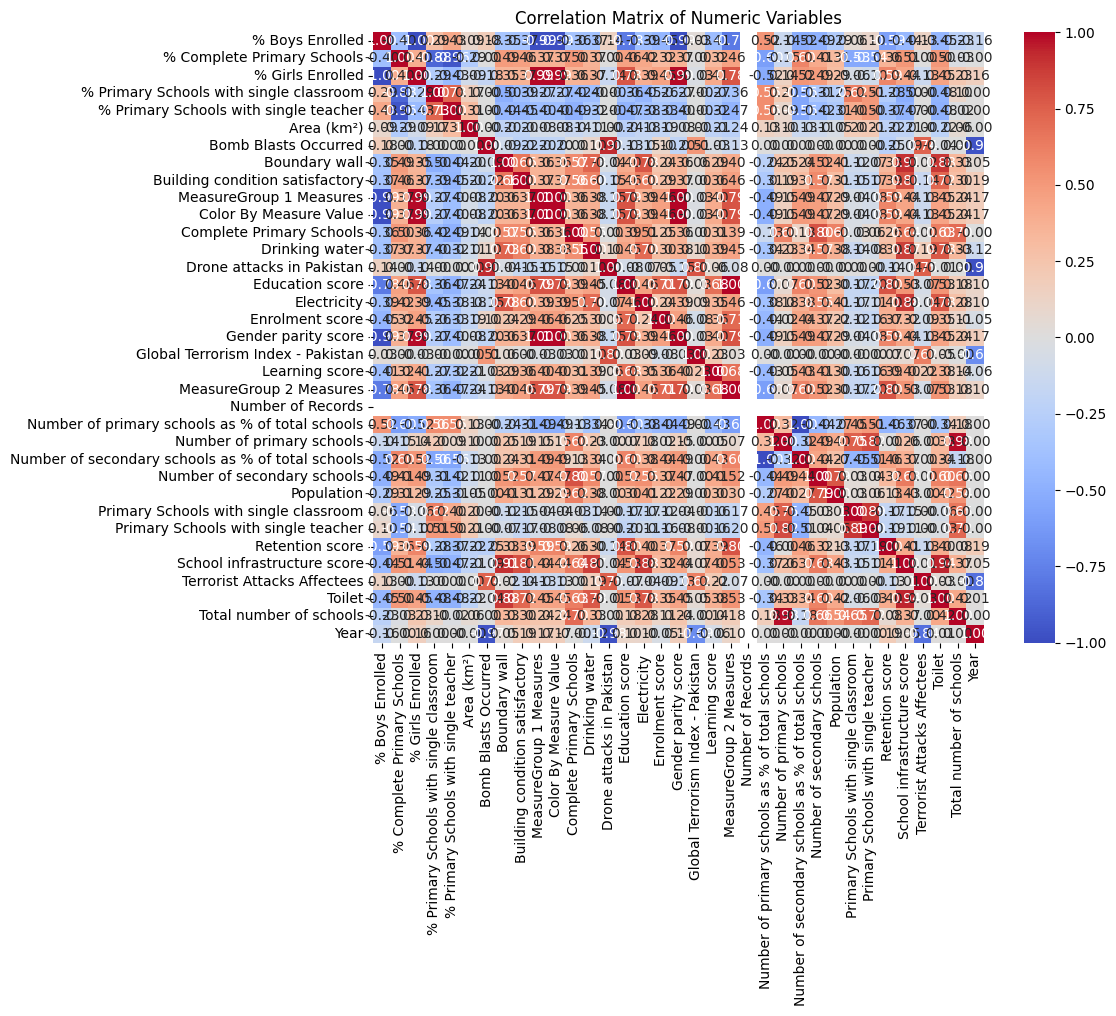


Highly Correlated Pairs (>0.7 or <-0.7):
% Boys Enrolled <-> % Girls Enrolled: -1.000
% Boys Enrolled <-> MeasureGroup 1 Measures: -0.988
% Boys Enrolled <-> Color By Measure Value: -0.988
% Boys Enrolled <-> Education score: -0.785
% Boys Enrolled <-> Gender parity score: -0.988
% Boys Enrolled <-> MeasureGroup 2 Measures: -0.785
% Complete Primary Schools <-> % Primary Schools with single classroom: -0.880
% Complete Primary Schools <-> % Primary Schools with single teacher: -0.955
% Girls Enrolled <-> MeasureGroup 1 Measures: 0.988
% Girls Enrolled <-> Color By Measure Value: 0.988
% Girls Enrolled <-> Education score: 0.785
% Girls Enrolled <-> Gender parity score: 0.988
% Girls Enrolled <-> MeasureGroup 2 Measures: 0.785
% Primary Schools with single classroom <-> % Primary Schools with single teacher: 0.733
Bomb Blasts Occurred <-> Drone attacks in Pakistan: 0.923
Bomb Blasts Occurred <-> Terrorist Attacks Affectees: 0.739
Bomb Blasts Occurred <-> Year: -0.968
Boundary wall <-> 

In [25]:
# Correlation Analysis
print("\nCorrelation Analysis:")
print("=" * 30)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()

    # Find highly correlated pairs
    print("\nHighly Correlated Pairs (>0.7 or <-0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))

    for pair in high_corr_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")


In [26]:
# Sample Analysis Functions
def analyze_gender_gap(df):
    """Analyze gender gap in enrollment"""
    boys_col = '% Boys Enrolled'
    girls_col = '% Girls Enrolled'

    if boys_col in df.columns and girls_col in df.columns:
        # Ensure both columns are numeric
        df[boys_col] = pd.to_numeric(df[boys_col], errors='coerce')
        df[girls_col] = pd.to_numeric(df[girls_col], errors='coerce')

        # Calculate gender gap only for valid data
        valid_data = df[[boys_col, girls_col]].dropna()
        if not valid_data.empty:
            df['Gender_Gap'] = df[boys_col] - df[girls_col]

            print("\nGender Gap Analysis:")
            print("=" * 30)
            valid_gap = df['Gender_Gap'].dropna()
            if not valid_gap.empty:
                print(f"Average Gender Gap: {valid_gap.mean():.2f}%")
                print(f"Standard Deviation: {valid_gap.std():.2f}%")
                print(f"Max Gender Gap: {valid_gap.max():.2f}%")
                print(f"Min Gender Gap: {valid_gap.min():.2f}%")

                if 'Province' in df.columns:
                    print(f"\nGender Gap by Province:")
                    gap_by_province = df.groupby('Province')['Gender_Gap'].agg(['mean', 'std']).round(2)
                    gap_by_province = gap_by_province.sort_values('mean', ascending=False)
                    print(gap_by_province)

                return df['Gender_Gap']
        else:
            print("\nNo valid enrollment data found for gender gap analysis")
    return None

# Run analysis functions
gender_gap = analyze_gender_gap(df)

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)


Gender Gap Analysis:
Average Gender Gap: 45.14%
Standard Deviation: 27.50%
Max Gender Gap: 100.00%
Min Gender Gap: 1.40%

Gender Gap by Province:
              mean    std
Province                 
FATA         65.23  24.29
Balochistan  63.50  26.35
KP           48.85  24.00
Sindh        48.53  22.03
GB           39.79  31.57
Punjab       26.55  17.99
AJK          20.79  14.67
ICT          12.95   5.03

ANALYSIS COMPLETE!
